# 1. Introduction - Task 2

In the current dataset you’re expected to track the user’s engagement using the
following engagement metrics:
- sessions frequency
- the duration of the session
- the sessions total traffic (download and upload (bytes))


Task 2.1 - Based on the above:
- Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric - (jupyter notebook + slide for top 10)
- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. - (jupyter notebook)
- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text. - (jupyter notebook + slide)
- Aggregate user total traffic per application and derive the top 10 most engaged users per application - (jupyter notebook + slide)
- Plot the top 3 most used applications. - (jupyter notebook + slide)
- Using *k*-means clustering algorithm, group users in *k* engagement clusters based on the engagement metrics:
    * What is the optimized value of *k*? - (slide)
    * Interpret your findings. - (slide)

# 2. Data Preparation

In [1]:
# loading libraries and setting up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.columns", None)

In [2]:
# loading our dataset from its saved pickle
df = pd.read_pickle('week_2_challenge.pkl')
df.head()

,Bearer Id,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 3. Data Analysis 

**Task:** Aggregate the following metrics per customer id (MSISDN) and report the top 10 customers per engagement metric:
- sessions frequency
- the duration of the session
- the sessions total traffic (download and upload (bytes))

In [3]:
task_2_df = df[['Bearer Id', 'MSISDN/Number', 'Dur. (ms).1','Total UL (Bytes)', 'Total DL (Bytes)']].copy()
task_2_df['Total Data (Bytes)'] = task_2_df['Total UL (Bytes)'] + task_2_df['Total DL (Bytes)']
task_2_df.sample(5)

,Bearer Id,MSISDN/Number,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
53210,7349883251331520512,3.364136e+10,183421364.0,48090485.0,722400060.0,770490545.0
125148,13114483550727399424,3.366761e+10,519456806.0,46828564.0,630918208.0,677746772.0
118253,7349883261122379776,3.365838e+10,88124314.0,50531021.0,211582762.0,262113783.0
75887,13114483563569899520,3.365053e+10,115081687.0,60615408.0,200164368.0,260779776.0
139447,13042425978778499072,3.376080e+10,86204057.0,35806900.0,382656882.0,418463782.0


In [4]:
# sessions per user
user_sessions = pd.DataFrame(task_2_df.groupby('MSISDN/Number')['Bearer Id'].count())

# get top 10
user_sessions['Bearer Id'].sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    1066
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.376054e+10      15
3.367588e+10      15
3.366716e+10      13
3.360313e+10      12
3.362708e+10      12
Name: Bearer Id, dtype: int64

In [5]:
# session duration per user
user_duration = pd.DataFrame(task_2_df.groupby('MSISDN/Number')['Dur. (ms).1'].sum())

# get top 10
user_duration['Dur. (ms).1'].sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    7.255155e+10
3.362578e+10    1.855376e+10
3.361489e+10    9.966906e+09
3.376054e+10    9.279442e+09
3.362632e+10    8.791937e+09
3.366716e+10    8.744922e+09
3.366284e+10    6.614274e+09
3.366469e+10    6.288736e+09
3.360313e+10    6.287767e+09
3.366746e+10    5.649885e+09
Name: Dur. (ms).1, dtype: float64

In [6]:
# total_data per user
user_data = pd.DataFrame(task_2_df.groupby('MSISDN/Number')['Total Data (Bytes)'].sum())

# get top 10
user_data['Total Data (Bytes)'].sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    5.317447e+11
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
Name: Total Data (Bytes), dtype: float64

In [7]:
# concatenate all of them
user_metrics = pd.merge(user_sessions, user_duration, left_index = True, right_index = True)
user_metrics = pd.merge(user_metrics, user_data, left_index = True, right_index = True)
user_metrics.head()

,Bearer Id,Dur. (ms).1,Total Data (Bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


**Task:** Compute the minimum, maximum, average & total non- normalized metrics for each cluster.

In [8]:
# get the descriptive statistics
user_metrics.describe().loc[['min', 'max', 'mean', 'count']]

,Bearer Id,Dur. (ms).1,Total Data (Bytes)
min,1.000000,7.142988e+06,3.324901e+07
max,1066.000000,7.255155e+10,5.317447e+11
mean,1.403755,1.468455e+08,6.959319e+08
count,106857.000000,1.068570e+05,1.068570e+05


**Task:** Aggregate user total traffic per application and derive the top 10 most engaged users per application.

In [9]:
first_app = df.columns.get_loc('Social Media DL (Bytes)')
last_app = df.columns.get_loc('Other UL (Bytes)')

# getting the application columns 
app_columns = []
for i in range(first_app, last_app + 1):
    app_columns.append(df.columns[i])

# insert MSISDN at top of list
app_columns.insert(0, 'MSISDN/Number')

# create dataframe with this
app_data = df[app_columns].copy()
app_data.head()

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.366496e+10,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0
1,3.368185e+10,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0
2,3.376063e+10,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0
3,3.375034e+10,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0
4,3.369980e+10,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0


In [10]:
# get total data per application
app_data['Social Media'] = app_data['Social Media DL (Bytes)'] + app_data['Social Media UL (Bytes)']
app_data['Google'] = app_data['Google DL (Bytes)'] + app_data['Google UL (Bytes)']
app_data['Email'] = app_data['Email DL (Bytes)'] + app_data['Email UL (Bytes)']
app_data['Youtube'] = app_data['Youtube DL (Bytes)'] + app_data['Youtube UL (Bytes)']
app_data['Netflix'] = app_data['Netflix DL (Bytes)'] + app_data['Netflix UL (Bytes)']
app_data['Gaming'] = app_data['Gaming DL (Bytes)'] + app_data['Gaming UL (Bytes)']
app_data['Other'] = app_data['Other DL (Bytes)'] + app_data['Other UL (Bytes)']

# dropping the unnecessary columns:
app_columns.remove('MSISDN/Number')
app_data = app_data.drop(columns = app_columns)

# previewing our modified dataset
app_data.head()

,MSISDN/Number,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
0,3.366496e+10,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,3.368185e+10,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,3.376063e+10,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,3.375034e+10,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,3.369980e+10,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


In [11]:
# get top 10 Social Media users
app_data.groupby('MSISDN/Number')['Social Media'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    1.973817e+09
3.362632e+10    4.337478e+07
3.376054e+10    3.978319e+07
3.365973e+10    3.541236e+07
3.361489e+10    2.829454e+07
3.362578e+10    2.713550e+07
3.366716e+10    2.424785e+07
3.378632e+10    2.397492e+07
3.366907e+10    2.380083e+07
3.360313e+10    2.307782e+07
Name: Social Media, dtype: float64

In [12]:
# get top 10 Google users
app_data.groupby('MSISDN/Number')['Google'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    8.248577e+09
3.362632e+10    1.521919e+08
3.362578e+10    1.423079e+08
3.361489e+10    1.279738e+08
3.376054e+10    1.232231e+08
3.365973e+10    1.165163e+08
3.378632e+10    1.102545e+08
3.367588e+10    1.098605e+08
3.366716e+10    1.050327e+08
3.376127e+10    9.708999e+07
Name: Google, dtype: float64

In [13]:
# get top 10 Email users
app_data.groupby('MSISDN/Number')['Email'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    2.399880e+09
3.362632e+10    4.241878e+07
3.361489e+10    4.078863e+07
3.362578e+10    4.063397e+07
3.378632e+10    3.631012e+07
3.365973e+10    3.599979e+07
3.376054e+10    3.369377e+07
3.367588e+10    3.151442e+07
3.366546e+10    3.041788e+07
3.366716e+10    3.033580e+07
Name: Email, dtype: float64

In [14]:
# get top 10 Youtube users
app_data.groupby('MSISDN/Number')['Youtube'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    2.434073e+10
3.362578e+10    4.529588e+08
3.376054e+10    3.962892e+08
3.361489e+10    3.943702e+08
3.362632e+10    3.744830e+08
3.367588e+10    3.174106e+08
3.366716e+10    3.152313e+08
3.362708e+10    3.087908e+08
3.376041e+10    3.031691e+08
3.369879e+10    3.026620e+08
Name: Youtube, dtype: float64

In [15]:
# get top 10 Netflix users
app_data.groupby('MSISDN/Number')['Netflix'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    2.425357e+10
3.365973e+10    3.995191e+08
3.361489e+10    3.614010e+08
3.362578e+10    3.569806e+08
3.376054e+10    3.346433e+08
3.362632e+10    3.287257e+08
3.376041e+10    3.183475e+08
3.366716e+10    3.139395e+08
3.367588e+10    3.090932e+08
3.378632e+10    3.059398e+08
Name: Netflix, dtype: float64

In [16]:
# get top 10 Gaming users
app_data.groupby('MSISDN/Number')['Gaming'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    4.614780e+11
3.361489e+10    7.749432e+09
3.376054e+10    7.461045e+09
3.362578e+10    7.326673e+09
3.367588e+10    6.970568e+09
3.362632e+10    6.887572e+09
3.365973e+10    6.725559e+09
3.366646e+10    6.646303e+09
3.376041e+10    6.268620e+09
3.366471e+10    6.103856e+09
Name: Gaming, dtype: float64

In [17]:
# get top 10 Other users
app_data.groupby('MSISDN/Number')['Other'].sum().sort_values(ascending = False).iloc[:10]

MSISDN/Number
4.188282e+10    4.509784e+11
3.362632e+10    8.167878e+09
3.361489e+10    7.639264e+09
3.367588e+10    6.798515e+09
3.362578e+10    6.354583e+09
3.360313e+10    6.326671e+09
3.365973e+10    6.317415e+09
3.362695e+10    5.305448e+09
3.362708e+10    5.117791e+09
3.376127e+10    5.077779e+09
Name: Other, dtype: float64

In [18]:
app_data.columns

Index(['MSISDN/Number', 'Social Media', 'Google', 'Email', 'Youtube',
       'Netflix', 'Gaming', 'Other'],
      dtype='object')

**Task:** Plot the top 3 most used applications.

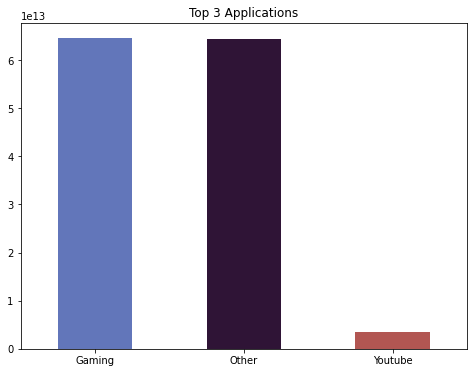

In [19]:
top_3_apps = app_data.sum().sort_values(ascending = False).iloc[1:4]
colors = sns.color_palette('twilight', len(top_3_apps))

plt.figure(figsize = (8, 6))
top_3_apps.plot(kind = 'bar', rot = 0, color = colors)
plt.title("Top 3 Applications")
plt.savefig('top 3 apps.png')
plt.show()

# 4. Data Modeling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_user_metrics = scaler.fit_transform(user_metrics)
scaled_user_metrics

array([[0.        , 0.00151048, 0.00159004],
       [0.        , 0.00239974, 0.00023248],
       [0.        , 0.00176204, 0.00105831],
       ...,
       [0.        , 0.011996  , 0.00037403],
       [0.        , 0.00338947, 0.00105892],
       [0.        , 0.01189204, 0.00019918]])

In [21]:
# applying KMeans clustering with k = 3
from sklearn.cluster import KMeans

kmeans = KMeans(3)

# fitting to our scaled data
kmeans.fit(scaled_user_metrics)

# getting our clusters
k3_clusters = kmeans.labels_
k3_clusters

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

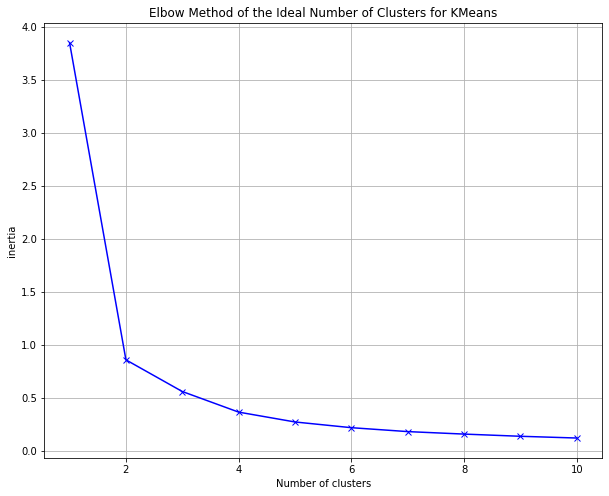

In [22]:
# using the Elbow Method to determine the ideal number of clusters for K-Means

wcss = [] # stands for "Within Cluster Sum of Squares"
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(scaled_user_metrics)
    wcss.append(kmeans.inertia_)
    
# visualizing the inertia (WCSS)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.title("Elbow Method of the Ideal Number of Clusters for KMeans")
plt.grid(True)
plt.savefig("elbow method.png")
plt.show()

From the above diagram, we see that the most ideal number of clusters to use is 5 because, from there, the decrease in inertia becomes insignificant.

In [23]:
# applying KMeans clustering with k = 5
k5 = KMeans(5)

# fitting to our scaled data
k5.fit(scaled_user_metrics)

# getting our clusters
k5_clusters = k5.labels_

# adding the clusters to our dataframe
user_metrics['clusters'] = k5_clusters.astype('object')

# previewing our dataframe
user_metrics.head()

,Bearer Id,Dur. (ms).1,Total Data (Bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,2
3.360100e+10,1,181230963.0,1.568596e+08,2
3.360100e+10,1,134969374.0,5.959665e+08,2
3.360101e+10,1,49878024.0,4.223207e+08,2
3.360101e+10,2,37104453.0,1.457411e+09,2


In [24]:
# previewing the distribution of clusters
user_metrics.clusters.value_counts()

2    91419
0    14784
3      628
4       25
1        1
Name: clusters, dtype: int64

In [25]:
# saving our data in CSV and pickle format
user_metrics.to_csv('user_engagement_analysis.csv', index = False)
user_metrics.to_pickle('user_engagement_analysis.pkl')

# 5. Summary & Recommendations